### Ch15 Figure2

In [1]:
# Your team works with the web designers to run a few experiments. They randomly replace images of young fit runners with those who are less fit and older. The team works with a data analyst to create reports to look at the difference. In the reports there is a drop in overall sales. 

version = ['young fit runners', 'less fit and older']

data = []

for i in range(1000):
    
    date = random_date()
    v = version[rd.randint(0,1)]
    value = rd.random() * 100
    
    if v == 0:
        if rd.random() <= 0.8:
            value *= 1.3
        else:
            value *= .8
            
    
    data.append([i, date, v, value])

df = pd.DataFrame(data, columns=['id', 'date', 'version', 'value'])
# df.to_csv('csv_output/ch15_fig2.csv', index=False)
df = pd.read_csv('csv_output/ch15_fig2.csv')
df.head()

,id,date,version,value
0,0,2009-03-29 01:16:34,young fit runners,8.853708
1,1,2009-03-11 13:33:59,young fit runners,67.295266
2,2,2009-03-25 07:32:48,less fit and older,83.722551
3,3,2009-03-23 05:57:30,less fit and older,82.323605
4,4,2009-03-20 21:43:40,less fit and older,25.289439


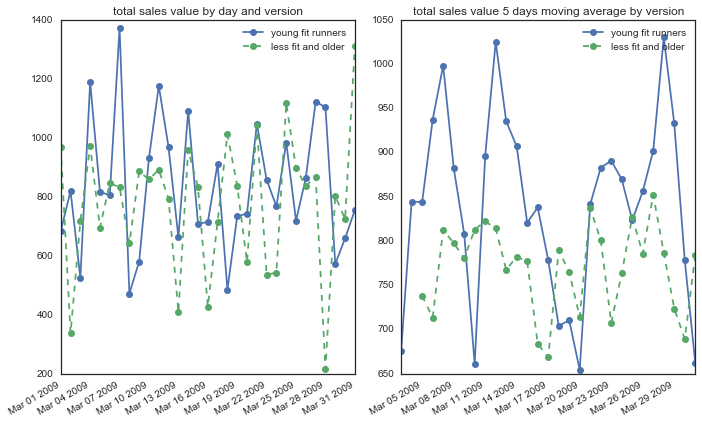

In [2]:
df = pd.read_csv('csv_output/ch15_fig2.csv')
df['date_new'] = df.date.map(lambda x: str(x)[:10])
df['date_new'] = pd.to_datetime(df.date_new)

%matplotlib inline
sns.set_style("white")

f, ax = plt.subplots(1,2, figsize=(10,6))

df2 = df.pivot_table(index='date_new', columns='version', values='value', aggfunc=np.sum).reset_index();
ax[0].plot_date(x=df2.date_new, y=df2['young fit runners'], fmt='o-');
ax[0].plot_date(x=df2.date_new, y=df2['less fit and older'], fmt='o--');
ax[0].legend(['young fit runners', 'less fit and older']);
ax[0].set_title('total sales value by day and version');

ax[1].plot_date(x=df2.date_new, y = df2['young fit runners'].rolling(center=False, window=3).mean(), fmt='o-');
ax[1].plot_date(x=df2.date_new, y = df2['less fit and older'].rolling(center=False, window=5).mean(), fmt='o--');
ax[1].legend(['young fit runners', 'less fit and older']);
ax[1].set_title('total sales value 5 days moving average by version');

f.autofmt_xdate()
f.tight_layout()

f.savefig('svg_output/ch15_fig2.svg', format='svg')

If just looking at the time-series, buyers that saw 'less fit and older' version of the page has slightly lower total sales by day. If looking at 5-days moving average, 'less fit and older' version is all lower the entire month.